In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
ruta = "M:\\Escritorio\\proyecto aa\\Energy_gap_prediction\\matpench_mp_gap_features.csv"
df = pd.read_csv(ruta)

In [6]:
X = df[["a",
        "b",
        "c",
        "alpha",
        "beta",
        "gamma",
        "volume",
        "density",
        "c_over_a",
        "b_over_a",
        "spacegroup",
    
]]

y = df["gap"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
model = RandomForestRegressor(
    n_estimators=148,
    max_depth=28,
    random_state=42
)

model.fit(X_train, y_train)

RandomForestRegressor(max_depth=28, n_estimators=148, random_state=42)

In [15]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE:{mae:.3f}")
print(rf"R^2 = {r2:.3f}")

MAE:0.782
R^2 = 0.474


<Axes: >

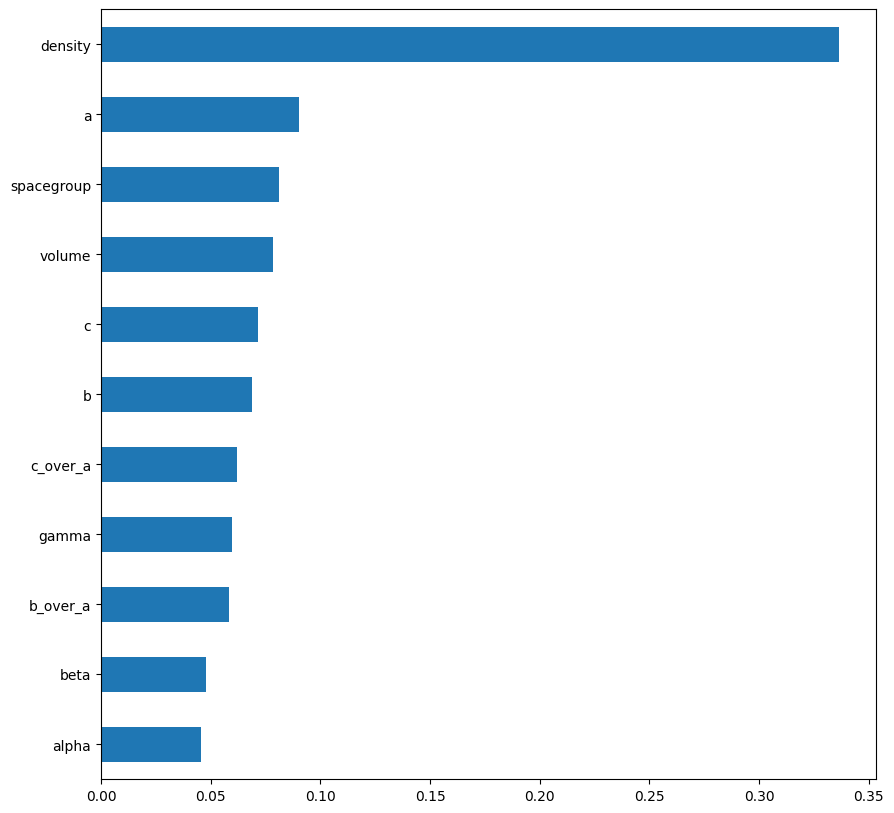

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(10,10))
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh')



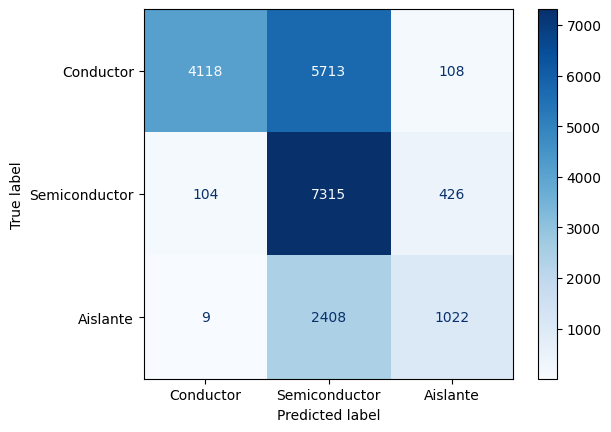

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def gap(gap):
    if gap < 0.1:
        return "Conductor"
    elif gap < 3:
        return "Semiconductor"
    else:
        return "Aislante"
    
y_test_cat = [gap(val) for val in y_test]
y_pred_cat = [gap(val) for val in y_pred]

cm  = confusion_matrix(y_test_cat, y_pred_cat, labels = ["Conductor","Semiconductor","Aislante"])

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Conductor", "Semiconductor", "Aislante"])
disp.plot(cmap="Blues")

In [25]:
zno = pd.Series(
    [3.2495, 3.2495, 5.2069, 90.0, 90.0, 120.0, 48.18, 5.606, 1.603, 1.0, 186],
    index=X.columns
)

pred_zno = model.predict(zno.values.reshape(1, -1))
print("Predicción para ZnO:", pred_zno[0])


Predicción para ZnO: 0.5345779974123059


c:\Users\Santiago Sabogal P\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [26]:
cu = pd.Series(
    [3.61292, 3.61292, 3.61292, 90.0, 90.0, 90.0, 47.1601, 8.950, 1.0, 1.0, 225],
    index=X.columns
)

pred_cu = model.predict(cu.values.reshape(1, -1))
print("Predicción para Cu (cobre):", pred_cu[0])


Predicción para Cu (cobre): 0.0


c:\Users\Santiago Sabogal P\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
